In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
#read all [194 users' oversampled data]
import csv
import pandas as pd
with open('Data/AllOversampledNData.csv') as csvfile:
    dataSet = list(csv.reader(csvfile, delimiter=','))
dfdataSet = pd.DataFrame(dataSet[0:][:])
dfdataSet.columns=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F17','F18','F19',
            'F20','F21','F22','F23','F24','F25','F26','F27','F28','F29','F30','F31','F32','F33','F34','F35','F36','F37','F38','F39',
            'F40','F41','F42','F43','F44','F45','F46','F47','F48','F49','F50','F51','F52','F53','F54','F55','F56','F57','F58','F59','F60',
            'F61','F62','F63','F64','F65','ID']
print('Done..')

Done..


In [ ]:
#Include the data to [dataframe] and reset user id from [0 to 194]
import numpy as np
import random
from sklearn.utils import shuffle
columnsN=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F17','F18','F19',
            'F20','F21','F22','F23','F24','F25','F26','F27','F28','F29','F30','F31','F32','F33','F34','F35','F36','F37','F38','F39',
            'F40','F41','F42','F43','F44','F45','F46','F47','F48','F49','F50','F51','F52','F53','F54','F55','F56','F57','F58','F59','F60',
            'F61','F62','F63','F64','F65','ID']
columnsF=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F17','F18','F19',
            'F20','F21','F22','F23','F24','F25','F26','F27','F28','F29','F30','F31','F32','F33','F34','F35','F36','F37','F38','F39',
            'F40','F41','F42','F43','F44','F45','F46','F47','F48','F49','F50','F51','F52','F53','F54','F55','F56','F57','F58','F59','F60',
            'F61','F62','F63','F64','F65']

fdataSet = pd.DataFrame(columns = columnsN)

#print(fdataSet)
for i in range (0,195):
  #fdataSet=fdataSet.append(shuffle(dfdataSet[1000*(i-1):i*1000]),ignore_index = True)
  fdataSet=fdataSet.append(dfdataSet[1000*i:(i+1)*1000])

fDataSet=fdataSet.drop(columns=['ID'])
#fDataSet=standardize(fDataSet,columns=columnsF)

fIDSet = pd.DataFrame(columns = ['ID'])
fIDSet=fdataSet['ID']
for i in range (0,195):
  fIDSet[1000*i:(i+1)*1000]=i

#fDataSet['ID'] = fIDSet

In [ ]:
#Print [user ID] of user
fDataSet=fDataSet[1:]
fIDSet=fIDSet[1:]
print(fIDSet)

1           0
2           0
3           0
4           0
5           0
         ... 
194995    194
194996    194
194997    194
194998    194
194999    194
Name: ID, Length: 194999, dtype: object


In [ ]:
#Seperate the data in two groups and then divided them to tranning set, validation set and test set for 194 users
import numpy as np
from numpy import array
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X1=fDataSet[:96999]
y1=fIDSet[:96999]
X2=fDataSet[97000:193999]
y2=fIDSet[97000:193999]

y2=y2-97
#print(y1.shape)
#print(X2)
#print(y2)

#Divide first 97 uses data in tranning set, validation set and test set for 97 users
#X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=22,stratify=y1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=22)
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, test_size=0.2, random_state=22)

y1_train = to_categorical(y1_train)
y1_val = to_categorical(y1_val)
y1_test = to_categorical(y1_test)

#Divide next 97 uses data in tranning set, validation set and test set for 97 users
#X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=22,stratify=y1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=22)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=0.2, random_state=22)

y2T=y2_train
y2V=y2_val
y2Te=y2_test

y2_train = to_categorical(y2_train)
y2_val = to_categorical(y2_val)
y2_test = to_categorical(y2_test)

Using TensorFlow backend.


In [ ]:
print(array(y1_train)[7])
print(array(y2_train)[7])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [ ]:
print(X2_train.shape)
print(X2_val.shape)
print(X2_test.shape)

(62079, 65)
(15520, 65)
(19400, 65)


In [ ]:
#import all necessary package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inlineimport keras
from keras.layers import Dense, Dropout, Input,Activation,Dropout, Flatten
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization
from keras.optimizers import Adam
import torch.nn.functional as F

In [ ]:
#define the optimizers
from keras.optimizers import SGD, RMSprop, Adam
def adam_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

def RMSprop_optimizer():
    return RMSprop(lr=0.001, rho=0.9)

In [ ]:
#Construct a classifier for the initial experiments

def create_classifier(release=False,Tuser=195):
  classifier = Sequential()
  classifier.add(Dense(128, input_dim=65))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))

  #classifier.add(Dense(256))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('relu'))

  classifier.add(Dense(256))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))

  classifier.add(Dense(256))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))

  #classifier.add(Dense(256))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('relu'))

  classifier.add(Dense(128))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))

  #if release:
  classifier.add(Dense(Tuser, activation='softmax'))
  #else:
  #   classifier.add(Dense(Tuser))
  #np.log_softmax_v2(a, axis=axis)
  #classifier.add(F.softmax(a, dim=1))

  classifier.compile(loss='categorical_crossentropy', optimizer=RMSprop_optimizer(),metrics=['accuracy'])
  return classifier

Clasf=create_classifier()
Clasf.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               8448      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_______________________________________

In [ ]:
#Train the classifier seperately for black-box attack
import keras

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, UpSampling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=1, factor=0.5,min_lr=0.0001)
callbacks_list = [learning_rate_reduction]

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=1, factor=0.5,min_lr=0.0001)
callbacks_list = [learning_rate_reduction]

Classfier2= create_classifier(True,97)

#------Comment will start from here
lossc='categorical_crossentropy'
optimizerc=RMSprop(lr=0.001, rho=0.9)
Classfier2.compile(loss=lossc, optimizer=optimizerc,metrics=['accuracy'])
#------Comments will end from here
historyc2 =  Classfier2.fit(X1_train, y1_train, batch_size=64, epochs=50, validation_data=(X1_val, y1_val),verbose=1, callbacks=callbacks_list)


Train on 62079 samples, validate on 15520 samples
Epoch 1/50
62079/62079 [==============================] - 9s 140us/step - loss: 1.5521 - accuracy: 0.4509 - val_loss: 1.1123 - val_accuracy: 0.5604
Epoch 2/50
 1600/62079 [..............................] - ETA: 6s - loss: 1.0711 - accuracy: 0.5713

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


62079/62079 [==============================] - 8s 125us/step - loss: 0.9408 - accuracy: 0.6289 - val_loss: 0.9003 - val_accuracy: 0.6545
Epoch 3/50
62079/62079 [==============================] - 8s 124us/step - loss: 0.6815 - accuracy: 0.7387 - val_loss: 0.6384 - val_accuracy: 0.7503
Epoch 4/50
62079/62079 [==============================] - 8s 125us/step - loss: 0.5162 - accuracy: 0.8063 - val_loss: 0.6306 - val_accuracy: 0.7613
Epoch 5/50
62079/62079 [==============================] - 8s 126us/step - loss: 0.4014 - accuracy: 0.8524 - val_loss: 0.4145 - val_accuracy: 0.8466
Epoch 6/50
62079/62079 [==============================] - 8s 124us/step - loss: 0.3305 - accuracy: 0.8806 - val_loss: 0.5391 - val_accuracy: 0.8203
Epoch 7/50
62079/62079 [==============================] - 8s 126us/step - loss: 0.2773 - accuracy: 0.8989 - val_loss: 0.4408 - val_accuracy: 0.8491
Epoch 8/50
62079/62079 [==============================] - 8s 127us/step - loss: 0.2433 - accuracy: 0.9126 - val_loss: 0.287

Text(0.5, 0, 'epochs')

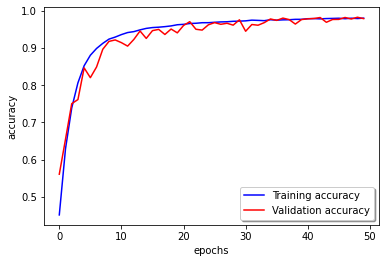

In [ ]:
# Plot the classifier loss and accuracy curves for training and validation data
import matplotlib.pyplot as plt
plt.plot(historyc2.history['accuracy'], color='b', label="Training accuracy")
plt.plot(historyc2.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.ylabel('accuracy')
plt.xlabel('epochs')

In [ ]:
#Performance of the classifier
Classfier2.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
loss, accuracy = Classfier2.evaluate(X1_test, y1_test)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

19400/19400 [==============================] - 1s 63us/step
Loss: 0.06950189665262348
Accuracy: 0.9777835011482239


In [ ]:
#[Performance] of the classifier for first user group
Classfier2.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
loss, accuracy = Classfier2.evaluate(X2_train, y2_train)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

62079/62079 [==============================] - 4s 60us/step
Loss: 44.73250299755235
Accuracy: 0.010921567678451538


In [ ]:
#Input the data of [second users' group] to the classifier
#Take only [top-ranked probability class index]
import numpy as np
rank=5
X22_train=Classfier2.predict(X2_train)
X22_test=Classfier2.predict(X2_test)
n1,m1=X22_train.shape
n2,m2=X22_test.shape

y22_train = np.zeros([n1,5], dtype=float)
y22_test = np.zeros([n2], dtype=float)


for i in range(n1):
  ind=X22_train[i].argsort()[-rank:][::-1]
  y22_train[i][0]=ind[0]

for i in range(n2):
  ind=X22_test[i].argsort()[-rank:][::-1]
  y22_test[i]=ind[0]

In [ ]:
#Code for file read
with open('Data/allSortedIndx.csv') as csvfile:
    allSort2 = list(csv.reader(csvfile, delimiter=','))
#allSort2=np.array(allSort2)
#n1=allSort2.size
#allSort22=np.zeros(int(n1/2))
#indx=0
#for i in range(n1):
#  if(i%2==1):
    #list.remove(allSort2[i])
#     numpy.delete(allSort2,i)
     #indx=indx+1

In [ ]:
#Based on top-ranked probability value [group all test data in different classes]
#Based on test data class and top-ranked probablity class of tranning sample
#calculate neighbor of top-ranked probablity class by using Euclidean distance based approach

from scipy.spatial import distance
import numpy

n1,m1=X2_train.shape
n2,m2=X2_test.shape

y2T=array(y2T)
y2Te=array(y2Te)
X2_train=array(X2_train)
X2_test=array(X2_test)
kNN=250
count=0;

#indx=2
sum=numpy.zeros(97)
allSort2=numpy.zeros((n1,97))

#distance.euclidean(X2_train[1].values, X2_test[1].values)
#print('Hello')
#with open('Data/allDistanceT.csv') as csvfile:
#    d = list(csv.reader(csvfile, delimiter=','))

for indx in range(5):
  d=numpy.zeros(n2)
  for j in range(n2):
    #d[j] = distance.euclidean(encoded_train[j], encoded_test[indx])
    d[j] = distance.euclidean(X2_train[indx].astype(float), X2_test[j].astype(float))

  ind=d.argsort()

  #classID=23
  allSum=0
  for classID in range(97): 
    sum1=0
    sum2=0
    k=0
    l=0
    while(k<kNN):
    #print(encoded_test[i])
      if(y22_test[ind[l]]==classID and y22_test[ind[l]]!=y22_train[indx][0]):
        #d = distance.euclidean(encoded_train[ind[k]], encoded_test[indx])
        d1 = d[ind[l]]
        #d = distance.euclidean(X2_train[ind[k]].astype(float), X2_test[indx].astype(float))
        sum1=sum1+np.exp(-d1)
        k=k+1
        l=l+1
      elif(y22_test[ind[l]]!=y22_train[indx][0]) :
        #d = distance.euclidean(encoded_train[ind[k]], encoded_test[indx])
        d2 = d[ind[l]]
        #d = distance.euclidean(X2_train[ind[k]].astype(float), X2_test[indx].astype(float))
        sum2=sum2+np.exp(-d2)
        k=k+1
        l=l+1
      else:
        l=l+1

    if(classID!=y22_train[indx][0]):
      sum[classID]=sum1/(sum1+sum2)
    else:
     sum[classID]=-1
 
  #allSum=allSum+(sum1/(sum1+sum2))
  sumsort=sum.argsort()
  allSort2[indx]=sumsort
  #print(sumsort)
  
  if(y22_train[indx][0]==sumsort[96]):
     count=count+1;
 #print(y2Te[indx])
 #print(count)

print((count/1000)*100)

0.0


In [ ]:
# writing to csv file  
with open('Data/allSortedIndx1.csv', 'w') as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)          
    # writing the data rows  
    csvwriter.writerows(allSort2)

In [ ]:
X22_train=Classfier2.predict(X2_train)
n1,m1=X22_train.shape
allSort2=np.array(allSort2)
n2=allSort2.size

rank=97
orgNeighbor=np.zeros([n1,97], dtype=float)
predNeighbor=np.zeros([n1,97], dtype=float)

orgNeighbor1=np.zeros([n1,5], dtype=float)
predNeighbor1=np.zeros([n1,5], dtype=float)

orgNeighbor2=np.zeros([n1,10], dtype=float)
predNeighbor2=np.zeros([n1,10], dtype=float)

for i in range(n2):
  if(i%2!=1):
    predNeighbor[int(i/2)]=allSort2[i]


for i in range(n1):
  orgNeighbor[i]=X22_train[i].argsort()[-rank:][::-1]

for i in range(n1):
   for j in range(1,6):
    orgNeighbor1[i][j-1]=orgNeighbor[i][j]
    predNeighbor1[i][j-1]=predNeighbor[i][97-j]

for i in range(n1):
   for j in range(1,11):
    orgNeighbor2[i][j-1]=orgNeighbor[i][j]
    predNeighbor2[i][j-1]=predNeighbor[i][97-j]

In [ ]:
# writing to csv file  
with open('Data/orgNeighborT.csv', 'w') as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)          
    # writing the data rows  
    csvwriter.writerows(orgNeighbor)

['8.0', '0.0', '70.0', '69.0', '68.0', '67.0', '66.0', '65.0', '64.0', '63.0', '62.0', '61.0', '60.0', '59.0', '58.0', '57.0', '56.0', '55.0', '54.0', '53.0', '52.0', '51.0', '71.0', '72.0', '73.0', '74.0', '94.0', '93.0', '92.0', '91.0', '90.0', '89.0', '88.0', '87.0', '86.0', '50.0', '85.0', '83.0', '82.0', '81.0', '80.0', '79.0', '78.0', '77.0', '76.0', '75.0', '84.0', '49.0', '48.0', '26.0', '95.0', '22.0', '21.0', '20.0', '19.0', '18.0', '17.0', '16.0', '15.0', '14.0', '13.0', '12.0', '11.0', '9.0', '7.0', '6.0', '5.0', '25.0', '4.0', '3.0', '28.0', '1.0', '44.0', '43.0', '42.0', '41.0', '40.0', '39.0', '27.0', '38.0', '34.0', '33.0', '32.0', '31.0', '30.0', '29.0', '2.0', '96.0', '10.0', '45.0', '37.0', '23.0', '35.0', '24.0', '47.0', '46.0', '36.0']
36.0


In [ ]:
commonSize1=np.zeros(n1)
commonSize2=np.zeros(n1)

for i in range(n1):
  orgNeighborSet1=set(orgNeighbor1[i])
  predNeighborSet1=set(predNeighbor1[i])
  common1 = orgNeighborSet1.intersection(predNeighborSet1)
  commonSize1[i]=len(common1)

  orgNeighborSet2=set(orgNeighbor2[i])
  predNeighborSet2=set(predNeighbor2[i])
  common2 = orgNeighborSet2.intersection(predNeighborSet2)
  commonSize2[i]=len(common2)

#print(commonSize)

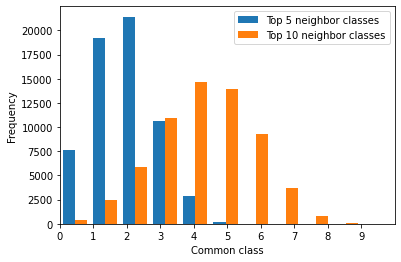

In [ ]:
import matplotlib.pyplot as plt
X=np.arange(0, n1, 1).tolist()
xlocs, xlabs = plt.xticks()
xlabs=[i for i in range(0,10)]
x_pos = [i for i, _ in enumerate(xlabs)] 
Y1=commonSize1
Y2=commonSize2
plt.hist([Y1,Y2])
plt.legend(['Top 5 neighbor classes','Top 10 neighbor classes'])
plt.ylabel('Frequency')
plt.xlabel('Common class')
plt.xlim(0,10)
#plt.ylim(0,11500)
plt.xticks(x_pos, xlabs)
#legend = plt.legend(loc='best', shadow=True)
plt.show()

In [ ]:
#Code for file read
#Take 4 neighbor of top-ranked class
allSort2=np.array(allSort2)
n1=allSort2.size
for i in range(n1):
  if(i%2!=1):
    y22_train[int(i/2)][1]=allSort2[i][96]
    y22_train[int(i/2)][2]=allSort2[i][95]
    y22_train[int(i/2)][3]=allSort2[i][94]
    y22_train[int(i/2)][4]=allSort2[i][93]

In [ ]:
#Take 4 neighbor of top-ranked class
for i in range(n1):
  y22_train[i][1]=allSort2[i][96]
  y22_train[i][2]=allSort2[i][95]
  y22_train[i][3]=allSort2[i][94]
  y22_train[i][4]=allSort2[i][93]

In [ ]:
#Fillup the table by 4 different probability based on neighborness
import numpy as np
import random

rank=5
n,m=X22_train.shape
X2_InvTrain = np.zeros([n, m], dtype=float)
for i in range(n):
 sumP=0
 start=0
 end=1
 for j in range(rank):
  if(j==0):
    X2_InvTrain[i,int(y22_train[i][j])]= X22_train[i, int(y22_train[i][j])]
    sumP+=X22_train[i, int(y22_train[i][j])]
  else:
    X2_InvTrain[i,int(y22_train[i][j])]=random.uniform(start, end)
    sumP+=X2_InvTrain[i,int(y22_train[i][j])]
    #print(X2_InvTrain[i,int(y22_train[i][j])])
  remaining=1-sumP
  #remaining=1-sum(X2_InvTrain[i])
  end=remaining
    #print(end)
  if(end >=0.1):
   start=end-0.1
  else:
   start=0
    #print(indx)
    
    #print(y1_Rand[i,indx])

In [ ]:
#print one of the probablity
print(X2_InvTrain[0])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.51944401e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.73829770e-04 9.99144197e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.96737242e-04 8.51332642e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [ ]:
#Create a inverse model for [black-box] attacks

def create_Invclassifier(Tuser=195):
  Invclassifier = Sequential()
  Invclassifier.add(Dense(128, input_dim=Tuser))
  Invclassifier.add(BatchNormalization())
  Invclassifier.add(Activation('tanh'))

  #Invclassifier.add(Dense(256))
  #Invclassifier.add(BatchNormalization())
  #Invclassifier.add(Activation('tanh'))

  Invclassifier.add(Dense(256))
  Invclassifier.add(BatchNormalization())
  Invclassifier.add(Activation('tanh'))

  Invclassifier.add(Dense(256))
  Invclassifier.add(BatchNormalization())
  Invclassifier.add(Activation('tanh'))

  #Invclassifier.add(Dense(256))
  #Invclassifier.add(BatchNormalization())
  #Invclassifier.add(Activation('tanh'))

  Invclassifier.add(Dense(128))
  Invclassifier.add(BatchNormalization())
  Invclassifier.add(Activation('tanh'))

  Invclassifier.add(Dense(65,activation='sigmoid'))

  #Invclassifier.compile(loss='mse', optimizer=adam_optimizer(),metrics=['accuracy'])
  return Invclassifier

InvClsf=create_Invclassifier()
InvClsf.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               25088     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
_________________________________________________________________
activation_9 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
batch_normalization_10 (Batc (None, 256)               1024      
_________________________________________________________________
activation_10 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)              

In [ ]:
#Train the inverse classifier seperately for black-box attack
import keras

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, UpSampling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=1, factor=0.5,min_lr=0.0001)
callbacks_list = [learning_rate_reduction]

InvClsfI1=create_Invclassifier(97)

#------Comment will start from here
lossc='mse'
optimizerc=RMSprop(lr=0.001, rho=0.9)
InvClsfI1.compile(loss=lossc, optimizer=optimizerc)
#------Comments will end from here
historyc2 =  InvClsfI1.fit(X2_InvTrain, X2_train, batch_size=64, epochs=200,verbose=1, callbacks=callbacks_list)

Epoch 1/200
62079/62079 [==============================] - 9s 138us/step - loss: 0.0289
Epoch 2/200
 1344/62079 [..............................] - ETA: 7s - loss: 0.0230

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


62079/62079 [==============================] - 8s 128us/step - loss: 0.0220
Epoch 3/200
62079/62079 [==============================] - 8s 130us/step - loss: 0.0208
Epoch 4/200
62079/62079 [==============================] - 8s 128us/step - loss: 0.0200
Epoch 5/200
62079/62079 [==============================] - 8s 134us/step - loss: 0.0194
Epoch 6/200
62079/62079 [==============================] - 8s 130us/step - loss: 0.0188
Epoch 7/200
62079/62079 [==============================] - 8s 128us/step - loss: 0.0185
Epoch 8/200
62079/62079 [==============================] - 8s 128us/step - loss: 0.0180
Epoch 9/200
62079/62079 [==============================] - 8s 127us/step - loss: 0.0177
Epoch 10/200
62079/62079 [==============================] - 8s 129us/step - loss: 0.0175
Epoch 11/200
62079/62079 [==============================] - 8s 130us/step - loss: 0.0173
Epoch 12/200
62079/62079 [==============================] - 8s 128us/step - loss: 0.0170
Epoch 13/200
62079/62079 [===============

Text(0.5, 0, 'epochs')

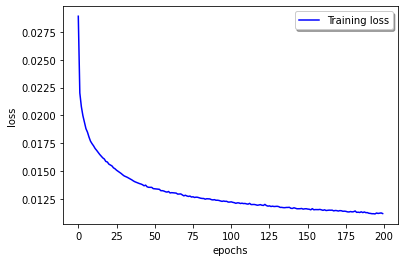

In [ ]:
# Plot the classifier loss and accuracy curves for training and validation data
import matplotlib.pyplot as plt
plt.plot(historyc2.history['loss'], color='b', label="Training loss")
#plt.plot(historyc3.history['val_loss'], color='r',label="Validation loss")
legend = plt.legend(loc='best', shadow=True)
plt.ylabel('loss')
plt.xlabel('epochs')

In [ ]:
#Code for file read
with open('Data/RankTable.csv') as csvfile:
    RankTable = list(csv.reader(csvfile, delimiter=','))
RankTable = pd.DataFrame(RankTable[0:][:])
#RankTable=np.array(RankTable)
#print(RankTable)
n1,m1=RankTable.shape
for i in range(n1):
  if (i%2!=0):
    RankTable=RankTable.drop(i)
RankTable.reset_index(drop=True, inplace=True)

In [ ]:
print(RankTable)

      0     1     2     3     4     5   ...    91    92    93    94    95    96
0    0.0  69.0  68.0  67.0  66.0  65.0  ...  11.0  24.0  47.0  12.0  35.0  36.0
1    0.0  69.0  68.0  67.0  66.0  65.0  ...  45.0  46.0  24.0  47.0  35.0  36.0
2    0.0  43.0  44.0  95.0  51.0  52.0  ...  35.0  36.0  71.0  69.0  72.0  70.0
3    0.0  61.0  60.0  59.0  58.0  57.0  ...  48.0  73.0  71.0  69.0  72.0  70.0
4    0.0  35.0  36.0  41.0  43.0  44.0  ...  59.0  57.0  89.0  70.0  27.0  28.0
..   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
92   0.0  36.0  41.0  42.0  45.0  49.0  ...  59.0  30.0  57.0  51.0  50.0  52.0
93   0.0  41.0  42.0  45.0  47.0  49.0  ...  30.0  59.0  57.0  51.0  50.0  52.0
94   0.0  34.0  35.0  40.0  41.0  42.0  ...   6.0  29.0  62.0   9.0  30.0   8.0
95  48.0  34.0  35.0  40.0  41.0  42.0  ...  28.0  29.0   9.0  62.0  30.0   8.0
96  96.0  34.0  35.0  42.0  43.0  24.0  ...   7.0  29.0   9.0  62.0  30.0   8.0

[97 rows x 97 columns]


In [ ]:
#Calculate the distance among test data
from scipy.spatial import distance
import numpy
n1,m1=X2_train.shape
n2,m2=X2_test.shape

y2T=array(y2T)
y2Te=array(y2Te)
X2_train=array(X2_train)
X2_test=array(X2_test)
kNN=250
d=numpy.zeros((n2,n2))
for i in range(n2):
  for j in range(n2):
    d[i][j] = distance.euclidean(X2_test[i].astype(float), X2_test[j].astype(float))

In [ ]:
#Calculate the neighbor of original class based on auxilary profile
from scipy.spatial import distance
import numpy as np
#encoded_train = encoder.predict(X2_train)
#encoded_test = encoder.predict(X2_test)

n1,m1=X2_train.shape
n2,m2=X2_test.shape

y2T=array(y2T)
y2Te=array(y2Te)
X2_train=array(X2_train)
X2_test=array(X2_test)
kNN=250
count=0;

#indx=2

allSort2=numpy.zeros((n1,97))

n1,m1=d.shape
unique_elements, counts_elements = np.unique(y2Te, return_counts=True)
RankDistance=numpy.zeros((unique_elements.size,unique_elements.size))
RankTable=numpy.zeros((unique_elements.size,unique_elements.size))

for classID1 in unique_elements:
   CID1index=numpy.zeros(counts_elements[classID1])
   n2=CID1index.size
   print(n2)
   indx=0
   for i in range(n1):
     if(y2Te[i]==classID1):
       CID1index[indx]=i
       indx=indx+1

   for classID2 in unique_elements:
     sumPUser=0
     #print(sumPUser)
     for eachIndx in range(n2):
       #print(CID1index[eachIndx])  
       ind=d[int(CID1index[eachIndx])].argsort() 
       sum1=0
       sum2=0 
       k=0 
       l=0 
       while (k<kNN and l<n2):
         if(y22_test[ind[l]]!=classID1 and y22_test[ind[l]]==classID2):
           #d = distance.euclidean(encoded_train[ind[k]], encoded_test[indx])
           d1 = d[int(CID1index[eachIndx])][ind[l]]
           #d = distance.euclidean(X2_train[ind[k]].astype(float), X2_test[indx].astype(float))
           sum1=sum1+np.exp(-d1)
           k=k+1
           l=l+1
         elif(y22_test[ind[l]]!=classID1) :
           #d = distance.euclidean(encoded_train[ind[k]], encoded_test[indx])
           d2 = d[int(CID1index[eachIndx])][ind[l]]
           #d = distance.euclidean(X2_train[ind[k]].astype(float), X2_test[indx].astype(float))
           sum2=sum2+np.exp(-d2)
           k=k+1
           l=l+1
         else:
           l=l+1
       
       sumPUser+= (sum1/(sum1+sum2))
       #print(sumPUser)
     #print(classID2)
     RankDistance[classID1][classID2]=sumPUser/n2
     #print(sumPUser/n2)
   RankTable[classID1]=RankDistance[classID1].argsort()

In [ ]:
#Print rank-table
print(RankTable)

In [ ]:
# writing to csv file  
with open('Data/RankTable.csv', 'w') as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)          
    # writing the data rows  
    csvwriter.writerows(RankTable)

In [ ]:
#Code for file read
#Random generation of input for inverse classifier
import numpy as np
rank=10
y22_train=Classfier2.predict(X1_train)
y22_train=array(y22_train)
n,m=y22_train.shape
y1_Rand = np.zeros([n, m], dtype=float)
#ind=y22_train[0].argsort()[-rank:][::-1]
#indx=int(float(RankTable[ind[0]][96]))
#print(indx)

for i in range(n):
 ind=y22_train[i].argsort()[-rank:][::-1]
 start=0.98
 end=1.0
 sumP=0
 for j in range(rank):
  if(j==0):
    np.put(y1_Rand[i], ind[0], random.uniform(start, end))
    sumP+=y1_Rand[i,ind[0]]
    #print(y1_Rand[i])
  else:
    indx=int(float(RankTable[ind[0]][97-j]))
    #indx=int(RankTable[ind[0],97-j])
    y1_Rand[i,indx]=random.uniform(start, end)
    sumP+=y1_Rand[i,indx]
  remaining=1-sumP
  end=remaining
  #print(end)
  if(end >=0.1):
   start=end-0.1
  else:
   start=0  

In [ ]:
#Random generation of input for inverse classifier
import numpy as np
rank=10
y22_train=Classfier2.predict(X1_train)
y22_train=array(y22_train)
n,m=y22_train.shape
y1_Rand = np.zeros([n, m], dtype=float)

for i in range(n):
 ind=y22_train[i].argsort()[-rank:][::-1]
 start=0.98
 end=1.0
 sumP=0
 for j in range(rank):
  if(j==0):
    np.put(y1_Rand[i], ind[0], random.uniform(start, end))
    sumP+=y1_Rand[i,ind[0]]
    #print(y1_Rand[i])
  else:
    indx=int(RankTable[ind[0],97-j])
    #indx=int(RankTable[ind[0],97-j])
    y1_Rand[i,indx]=random.uniform(start, end)
    sumP+=y1_Rand[i,indx]
  remaining=1-sumP
  end=remaining
  #print(end)
  if(end >=0.1):
   start=end-0.1
  else:
   start=0

In [ ]:
#print random generated input
print(y1_Rand[0])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.64937560e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.16830720e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.94221689e-01 0.00000000e+00 0.00000000e+00 1.36741673e-06
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [ ]:
#Calculate the accuracy of data generated by inverse classifier
#Input random generated probablity input to inverse classifier to get data sample
#Input those data samples to the classifier
X1_Rand=InvClsfI1.predict(y1_Rand)
Classfier2.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['categorical_accuracy'])
loss, accuracy = Classfier2.evaluate(X1_Rand, y1_train)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

62079/62079 [==============================] - 3s 42us/step
Loss: 6.5013152592982415
Accuracy: 0.35185810923576355


In [ ]:
from sklearn.metrics import classification_report

Y_train = np.argmax(y1_train, axis=1)
y_pred=Classfier2.predict_classes(X1_Rand)
#print(keras.metrics.categorical_accuracy(y1_train, y_pred))
allResult=classification_report(Y_train, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import ast
print(allResult)

              precision    recall  f1-score   support

           0       0.71      0.85      0.78       660
           1       0.33      0.82      0.47       625
           2       0.00      0.00      0.00       605
           3       1.00      0.08      0.14       635
           4       0.05      0.01      0.02       652
           5       0.00      0.00      0.00       618
           6       0.00      0.00      0.00       639
           7       0.32      0.96      0.48       617
           8       0.95      0.88      0.92       659
           9       0.74      0.75      0.74       635
          10       0.01      0.05      0.02       644
          11       1.00      0.70      0.83       628
          12       0.99      0.94      0.96       666
          13       0.10      0.03      0.05       641
          14       0.00      0.00      0.00       640
          15       0.00      0.00      0.00       658
          16       0.00      0.00      0.00       631
          17       0.77    

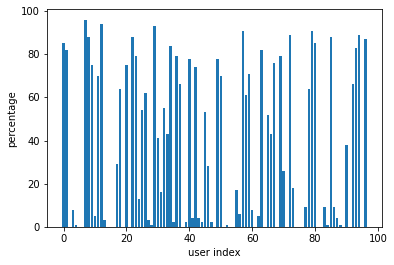

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
#ax = fig.add_axes([0,0,97,1])
listu=np.arange(0, 97, 1).tolist()
accept = [0.85,0.82,0.00,0.08,0.01,0.00,0.00,0.96,0.88,0.75,0.05,0.70,0.94,0.03,0.00,0.00,0.00,0.29,0.64,0.00,
          0.75,0.00,0.88,0.79,0.13,0.54,0.62,0.03,0.01,0.93,0.41,0.16,0.55,0.43,0.84,0.02,0.79,0.66,0.00,0.02,
          0.78,0.04,0.74,0.04,0.02,0.53,0.28,0.02,0.00,0.78,0.70,0.00,0.01,0.00,0.00,0.17,0.06,0.91,0.61,0.71,
          0.08,0.00,0.05,0.82,0.00,0.52,0.43,0.76,0.00,0.79,0.26,0.00,0.89,0.18,0.00,0.00,0.00,0.09,0.64,0.91,
          0.85,0.00,0.00,0.09,0.01,0.88,0.09,0.04,0.01,0.00,0.38,0.00,0.66,0.83,0.89,0.00,0.87]
accept=np.array(accept) 
accept=100 *accept         
plt.bar(listu,accept)
plt.ylabel('percentage')
plt.xlabel('user index')
plt.show()